#  **Titanic - Machine Learning from Disaster**

I am a beginner in the field of machine learning. This notebook is an attempt to start my machine learning journey. Please give it an upvote, it will motivate me. Any suggestion is also welcomed.

# **1.) Importing Libraries**


  The first step is to import inbuilt python libraries. 

In [1]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **2.) Reading Data**

Now we will read the train and test data given. We will import this data and explore it to understand and analyse it.

In [2]:
#reading training data
train_data = pd.read_csv('../input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#reading testing data
test_data = pd.read_csv('../input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# ** 3.) Analysing Data**

Now we will analyse the data,look how the data is different in test and train csv files.

In [4]:
#printing the column names in the training data
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
#printing the column names in the testing data
print(test_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


we can see that the training data has an extra columns - 'Survived'. It is so because we have to predict the survival of the passengers whose details have been given in the testing data.

# **4.) Data Visualization**

Now we will visualize the data so that we can better understand it.

# Pclass

Percentage of survivors of Pclass = 1: 62.96296296296296
Percentage of survivors of Pclass = 2: 47.28260869565217
Percentage of survivors of Pclass = 3: 24.236252545824847


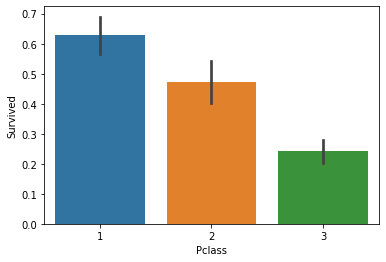

In [6]:
#drawing a bar plot of survival by Pclass
sns.barplot(x='Pclass', y='Survived' , data = train_data)

#printing percentage of people who survived by Pclass
print('Percentage of survivors of Pclass = 1:' ,train_data['Survived']
      [train_data ['Pclass']==1].value_counts(normalize=True)[1]*100)

print('Percentage of survivors of Pclass = 2:' ,train_data['Survived']
      [train_data ['Pclass']==2].value_counts(normalize=True)[1]*100)

print('Percentage of survivors of Pclass = 3:' ,train_data['Survived']
      [train_data ['Pclass']==3].value_counts(normalize=True)[1]*100)






From the above bar graph we can see that the people belonging to the first class survived the most while the people belonging to the third class have the least chances of survival.

# Sex

Percentage of male survivors is :  18.890814558058924
Percentage of female survivors is :  74.20382165605095


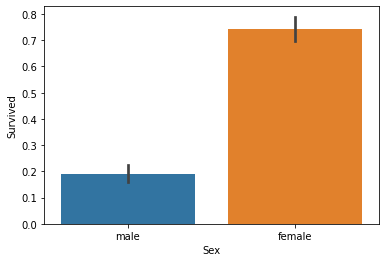

In [7]:
# drawing a bar plot of the survivors by sex
sns.barplot(x='Sex' , y='Survived' , data = train_data)

#printing the percentage of survivors by sex 
print('Percentage of male survivors is : ',train_data['Survived']
    [train_data['Sex']=='male'].value_counts(normalize = True)[1]*100)

print('Percentage of female survivors is : ',train_data['Survived']
    [train_data['Sex']=='female'].value_counts(normalize = True)[1]*100)



From the above bar graph we can see that the chances of the females surviving are lot more than the male surviving.

# Age

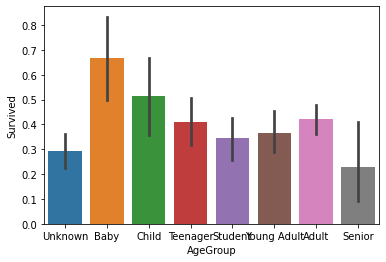

In [8]:
#Sorting ages into logical categories
train_data['Age']= train_data['Age'].fillna(-0.5)
test_data['Age'] = test_data['Age'].fillna(-0.5)

bins = [-1, 0, 3, 12, 19, 24, 30, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 
          'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins, labels=labels)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins, labels=labels)

#drawing a bar plot of AgeGroup vs Survived
sns.barplot(x = 'AgeGroup', y='Survived', data = train_data)
plt.show()




From the above bar plot we can see that the babies had the best chances of the survival. 

# SibSp

Percentage of survivors having SibSp = 0:  34.53947368421053
Percentage of survivors having SibSp = 1:  53.588516746411486
Percentage of survivors having SibSp = 2:  46.42857142857143
Percentage of survivors having SibSp = 3:  25.0
Percentage of survivors having SibSp = 4:  16.666666666666664


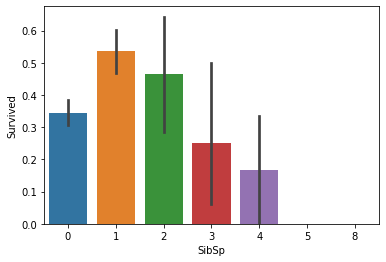

In [9]:
#Plotting bar plot SibSp vs Survived
sns.barplot(x= 'SibSp' , y='Survived', data= train_data)

#calculating percentages of the survived with respect to SibSp
print("Percentage of survivors having SibSp = 0: ", train_data["Survived"]
      [train_data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of survivors having SibSp = 1: ", train_data["Survived"]
      [train_data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of survivors having SibSp = 2: ", train_data["Survived"]
      [train_data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of survivors having SibSp = 3: ", train_data["Survived"]
      [train_data["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of survivors having SibSp = 4: ", train_data["Survived"]
      [train_data["SibSp"] == 4].value_counts(normalize = True)[1]*100)

We can see from the above bar plot that the people who have only one sibling or spouse survived the most.

# Parch

Percentage of survivors having Parch = 0:  34.365781710914455
Percentage of survivors having Parch = 1:  55.08474576271186
Percentage of survivors having Parch = 2:  50.0
Percentage of survivors having Parch = 3:  60.0
Percentage of survivors having Parch = 5:  20.0


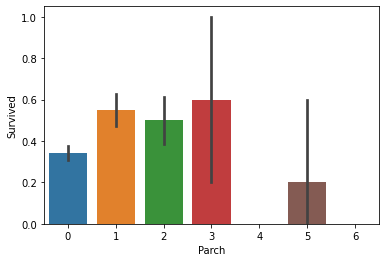

In [10]:
#plotting a bar graph of Parch vs Survived
sns.barplot(x='Parch', y='Survived', data= train_data)

#Calculating percentages of the survived with respect to Parch
print("Percentage of survivors having Parch = 0: ", train_data["Survived"]
      [train_data["Parch"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of survivors having Parch = 1: ", train_data["Survived"]
      [train_data["Parch"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of survivors having Parch = 2: ", train_data["Survived"]
      [train_data["Parch"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of survivors having Parch = 3: ", train_data["Survived"]
      [train_data["Parch"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of survivors having Parch = 5: ", train_data["Survived"]
      [train_data["Parch"] == 5].value_counts(normalize = True)[1]*100)




From the above bar graph we can see that the people having 1,2 or 3  parents or children have high chances of survival. While who have 5 or no parents or children have lower chances of survival.

# Cabin

Percentage of survivors not having Cabin Number :  29.985443959243085
Percentage of survivors  having Cabin Number :  66.66666666666666


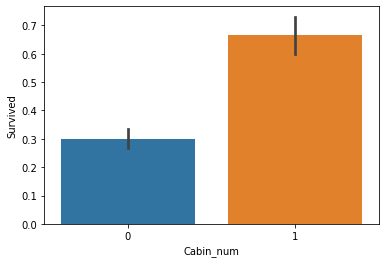

In [11]:
train_data['Cabin_num']= (train_data['Cabin'].notnull().astype('int'))
test_data['Cabin_num']= (test_data['Cabin'].notnull().astype('int'))

#Plotting a bar graph of Cabin_num vs Survived
sns.barplot(x='Cabin_num', y ='Survived',data = train_data)

#Calculating the percentages of survivors having or not having cabin number

print('Percentage of survivors not having Cabin Number : ' , train_data['Survived']
     [train_data["Cabin_num"]==0].value_counts(normalize = True)[1]*100)

print('Percentage of survivors  having Cabin Number : ' , train_data['Survived']
     [train_data["Cabin_num"]==1].value_counts(normalize = True)[1]*100)

From the above bar graph we can see that the people having cabin numbers have higher chances of survival. 

# Observations

From the above visulizations and calculations let's see that what things a person must need to survive on titanic.

Let's say Rose is on titanic, now what conditions (other than jack) she must have to survive.

1.) Must belong to first class (Pclass = 1)


2.) Sex must be female (which she is)


3.) Must belong to age group 0-12  (which she is not, but let's ignore this fact for now)


4.) Must have 1 or 2 sibling or spouse


5.) Must have 2 or 3 parents or children


6.) Must have a cabin number 

So these are some points that will play an important role in saving the life of our dear Rose.

These observations are based purely on the human perception. If we will provide the above visualized data to a human he or she, will make observations like these. 
But what about machines? machines don't rely on visualized data they take on data in the form of 0s and 1s. 
we will see how the data we have is cleaned, filled and prepared to be read by a machine so that it can make predictions based on that data.



# **5.) Cleaning Data**

Now we will clean our data and look for any missing values or unnecessary information.

Lookin at the train data.

In [12]:
train_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_num
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,8,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,283,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,0.000000


Looking at the test data.

In [13]:
test_data.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_num
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,121,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


# Ticket
We can drop this feature as it has no effect on the survival of passengers.

In [14]:
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)


# Cabin

If we look into the data 77% of Cabin data is missing from the train_data.We should not try to replace this much of missing data.Therfore we will drop the cabin data from the train and test data sets.



In [15]:
#dropping Cabin column from train and test data set.

train_data = train_data.drop(['Cabin'],axis = 1)
test_data = test_data.drop(['Cabin'],axis = 1)

# Age

Age column is missing about 20% of the values in the training dataset. Now we will have to fill these missing values.

In [16]:
#creating a combined group of both datasets
combine = [train_data , test_data]

#extracting the title of each name from both datasets
for title in combine:
    title['Title'] = title.Name.str.extract(' ([A-Za-z]+)\.',expand = False)
                                            
pd.crosstab(train_data['Title'],test_data['Sex'])

Sex,female,male
Title,,
Don,0,1
Dr,0,3
Master,9,14
Miss,37,64
Mme,0,1
Mr,83,145
Mrs,21,37
Rev,2,1


In [17]:
#mapping each of the title group to a numerical value
title_mapping = {'Don': 1, 'Dr': 2, 'Master' : 3, 'Miss' : 4, 'Mme' : 5, 'Mr' : 6, 'Mrs' : 7,
                'Rev': 8}

for title in combine:
    title['Title'] = title['Title'].map(title_mapping)
    title["Title"] = title["Title"].fillna(0)
    

In [18]:
#Filling the missing age with mode age group for each title
Don_age = train_data[train_data['Title']==1]['AgeGroup'].mode     #senior
Dr_age = train_data[train_data['Title']==2]['AgeGroup'].mode      #Adult
Master_age = train_data[train_data['Title']==3]['AgeGroup'].mode  #Adult
Miss_age = train_data[train_data['Title']==4]['AgeGroup'].mode    #Student
Mme_age = train_data[train_data['Title']==5]['AgeGroup'].mode     #Adult
Mr_age = train_data[train_data['Title']==6]['AgeGroup'].mode      #Student
Mrs_age = train_data[train_data['Title']==7]['AgeGroup'].mode     #Adult
Rev_age = train_data[train_data['Title']==8]['AgeGroup'].mode     #Senior

age_title_mapping = {1 : 'Senior', 2 : 'Adult', 3 : 'Adult', 4 : 'Student', 5: 'Adult', 6: 'Student', 7 : 'Adult', 8: 'Senior'}

for i in range(len(train_data['AgeGroup'])):
    if train_data['AgeGroup'][i] == 'Unknown':
        train_data['AgeGroup'][i] = age_title_mapping[train_data['Title'][i]]
        


In [19]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)


# Name
As we have extracted the titles from the names, we can now drop the name column.

In [20]:
#Dropping Name title
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

# Sex
Now we will map the sex column to numerical values.

In [21]:
#Mapping Sex to numerical value
Sex_mapping = { 'male' : 0 , 'female' : 1}
train_data['Sex'] = train_data['Sex'].map(Sex_mapping)
test_data['Sex'] = test_data['Sex'].map(Sex_mapping)

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_num,Title
0,1,0,3,0,22.0,1,0,7.2500,S,4.0,0,6.0
1,2,1,1,1,38.0,1,0,71.2833,C,6.0,1,7.0
2,3,1,3,1,26.0,0,0,7.9250,S,5.0,0,4.0
3,4,1,1,1,35.0,1,0,53.1000,S,6.0,1,7.0
4,5,0,3,0,35.0,0,0,8.0500,S,6.0,0,6.0


# Embarked 
There are 2 values missing in the embarked column. We will fill them.

In [23]:
# Looking at the different Embarked values
Southampton = train_data[train_data['Embarked']=='S'].shape[0]
print('Number of people Embarked in Southampton (S) : ',Southampton)

Cherbourg = train_data[train_data['Embarked']=='C'].shape[0]
print('Number of people Embarked in Southampton (C) : ',Cherbourg)

Queenstown = train_data[train_data['Embarked']=='Q'].shape[0]
print('Number of people Embarked in Southampton (Q) : ',Queenstown)





Number of people Embarked in Southampton (S) :  644
Number of people Embarked in Southampton (C) :  168
Number of people Embarked in Southampton (Q) :  77


We can see that most of the people embarked from Southampton, therefore we will fill the missing values with Southamption(S).

In [24]:
#Filling the missing embarked values with S
train_data = train_data.fillna({'Embarked' : 'S'})


Now we will map the embarked column to numerical values


In [25]:

#mapping Embarked column to numerical values
Embarked_mapping = {'S' : 1, 'C' : 2, 'Q' : 3}
train_data['Embarked'] = train_data['Embarked'].map(Embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(Embarked_mapping)

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_num,Title
0,1,0,3,0,22.0,1,0,7.2500,1,4.0,0,6.0
1,2,1,1,1,38.0,1,0,71.2833,2,6.0,1,7.0
2,3,1,3,1,26.0,0,0,7.9250,1,5.0,0,4.0
3,4,1,1,1,35.0,1,0,53.1000,1,6.0,1,7.0
4,5,0,3,0,35.0,0,0,8.0500,1,6.0,0,6.0


# Fare
Now we will try to fit the fare values into some logical groups. Fare is missing one value we will fill it.

In [27]:
#filling the missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"][x]):
        pclass = test_data["Pclass"][x] #Pclass = 3
        test_data["Fare"][x] = round(train_data[train_data["Pclass"] == pclass]["Fare"].mean(), 4)
        
        
# Fitting fare values into logical groups
train_data['Fareband']= pd.qcut(train_data['Fare'], 4, labels = [1,2,3,4])
test_data['Fareband']= pd.qcut(test_data['Fare'], 4, labels = [1,2,3,4])



In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_num,Title,Fareband
0,1,0,3,0,22.0,1,0,7.2500,1,4.0,0,6.0,1
1,2,1,1,1,38.0,1,0,71.2833,2,6.0,1,7.0,4
2,3,1,3,1,26.0,0,0,7.9250,1,5.0,0,4.0,2
3,4,1,1,1,35.0,1,0,53.1000,1,6.0,1,7.0,4
4,5,0,3,0,35.0,0,0,8.0500,1,6.0,0,6.0,2


We have mapped both Age and Fare column in a group of logical values - AgeGroup and Fareband. So, we will drop both Age and Fare columns from the data.

In [29]:
#Dropping Age column
train_data = train_data.drop(['Age'], axis = 1)
test_data = test_data.drop(['Age'], axis = 1)

#Dropping Fare column
train_data = train_data.drop(['Fare'], axis = 1)
test_data = test_data.drop(['Fare'], axis = 1)

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_num,Title,Fareband
0,1,0,3,0,1,0,1,4.0,0,6.0,1
1,2,1,1,1,1,0,2,6.0,1,7.0,4
2,3,1,3,1,0,0,1,5.0,0,4.0,2
3,4,1,1,1,1,0,1,6.0,1,7.0,4
4,5,0,3,0,0,0,1,6.0,0,6.0,2


In [31]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_num,Title,Fareband
0,892,3,0,0,0,3,6.0,0,6.0,1
1,893,3,1,1,0,1,6.0,0,7.0,1
2,894,2,0,0,0,3,7.0,0,6.0,2
3,895,3,0,0,0,1,5.0,0,6.0,2
4,896,3,1,1,1,1,4.0,0,7.0,2


In [32]:
train_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_num,Title,Fareband
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.0
mean,446.000000,0.383838,2.308642,0.352413,0.523008,0.381594,1.361392,4.611672,0.228956,5.491582,NaN
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,0.635673,1.397284,0.420397,1.330999,NaN
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,4.000000,NaN
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,6.000000,NaN
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,6.000000,0.000000,6.000000,NaN


In [33]:
test_data.describe(include = 'all')

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_num,Title,Fareband
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0
mean,1100.500000,2.265550,0.363636,0.447368,0.392344,1.464115,4.743976,0.217703,5.590909,NaN
std,120.810458,0.841838,0.481622,0.896760,0.981429,0.685516,1.411260,0.413179,1.268551,NaN
min,892.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN
25%,996.250000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,6.000000,NaN
50%,1100.500000,3.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,6.000000,NaN
75%,1204.750000,3.000000,1.000000,1.000000,0.000000,2.000000,6.000000,0.000000,6.000000,NaN


Now we have cleaned our data and made sure that no value is missing in the data. 

# 6.) Machine Learning Models 

There are a number of machine learning models available.We choose the model according to our need.
Here I will test different models just for the sake of learning.

we will use: 
* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

# Splitting the training data

First we will split our training data. By splitting the data we mean that we will take a certain amount of training data to train the model.

In [34]:
from sklearn.model_selection import train_test_split
predictors = train_data.drop(['Survived','PassengerId'], axis = 1)
target = train_data['Survived']
x_train ,x_val, y_train, y_val = train_test_split(predictors , target , test_size = 0.22 , random_state = 0)

In [35]:
predictors.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_num,Title,Fareband
0,3,0,1,0,1,4.0,0,6.0,1
1,1,1,1,0,2,6.0,1,7.0,4
2,3,1,0,0,1,5.0,0,4.0,2
3,1,1,1,0,1,6.0,1,7.0,4
4,3,0,0,0,1,6.0,0,6.0,2


In [36]:
x_train.describe(include ='all')

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_num,Title,Fareband
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
mean,2.314121,0.347262,0.537464,0.394813,1.354467,4.621037,0.230548,5.485591,NaN
std,0.835298,0.476443,1.152528,0.826877,0.636550,1.416932,0.421487,1.319930,NaN
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,4.000000,NaN
50%,3.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,6.000000,NaN
75%,3.000000,1.000000,1.000000,0.000000,2.000000,6.000000,0.000000,6.000000,NaN


Here we have taken 22% of our training data to train our model.We have set our predictors to nine columns and have set our target "Survived" column.

# 7.)Testing ML Models

# Gaussian Naive Bayes

In [37]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gaussian)

80.2


After applying the model we received the value of 80.2. This is the accuracy value we have achieved from our model that we trained and tested. This value will different for different models.

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred , y_val)*100 , 2)
print(acc_logreg)

79.19


# Support Vector Machines

In [39]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_svc)

81.22


# Perceptron

In [40]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_perceptron)

74.11


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree= round(accuracy_score(y_pred,y_val)*100,2)
print(acc_decisiontree)

82.74


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train,y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_randomforest)

84.26


# KNN or K - Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_ped = knn.predict(x_val)
acc_knn = round (accuracy_score(y_pred, y_val)*100,2)
print(acc_knn)


84.26


# Stochastic Gradient Descent

In [44]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_sgd)

76.65


# Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_gbc)

83.25


We have tested our models and received the accuracy values. Now let's compare these accuracy scores.

In [46]:
models = pd.DataFrame({ 'Model' : ['Gaussian Naive Bayes' , 'Logistic Regression' , 'Support Vector Machines' , 'Perceptron' ,
                                  'Decision Tree' , 'Random Forest' , 'KNN or K - Nearest Neighbors' , 'Stochastic Gradient Descent' , 
                                   'Gradient Boosting Classifier'],
                      
                      'Score' : [acc_gaussian , acc_logreg , acc_svc , acc_perceptron , acc_decisiontree ,  acc_randomforest , 
                                acc_knn , acc_sgd , acc_gbc ]})

models.sort_values(by = 'Score' )

,Model,Score
3,Perceptron,74.11
7,Stochastic Gradient Descent,76.65
1,Logistic Regression,79.19
0,Gaussian Naive Bayes,80.20
2,Support Vector Machines,81.22
4,Decision Tree,82.74
8,Gradient Boosting Classifier,83.25
5,Random Forest,84.26
6,KNN or K - Nearest Neighbors,84.26


We can see in the above table that we recieved the least accuracy score in the Perceptron model while we received the highest accuracy score in the Gradient Boosting Classifier. Therefore we can say that Gradient Boosting Classifier is the best model for predicting the survivors. 


# 8.) Our Predictions

Now we will see what we have predicted so far.

In [47]:
# Setting PassengerId as Pid and Survived as Predictions
Pid = test_data["PassengerId"]
Predictions = gbc.predict(test_data.drop('AgeGroup',axis=1))

#converting the output to a dataframe
output = pd.DataFrame({'PassengerId': Pid , 'Survived': Predictions})

In [48]:
output.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


We can see that our model is predicting whether a passenger will survive or not. I created output data frame as per the rules of the competition with 'PassengerId' and "Survived' as two columns. Now we will submit our data.

# 9.) Submitting our Predictions

In [49]:
# submitting output dataframe
output.to_csv('submission.csv' , index = False)

Thank you for reading my code. If you find it useful please give an upvote it will motivate me to write more valuable codes.

Let's Learn Data Science Together.

Thank You



**References** 

* https://www.kaggle.com/startupsci/titanic-data-science-solutions